# Ajuste de curvas de las acciones de Amazon#

Nuestro proyecto consiste en mostrar en una grafica la manera en como se han comportado las acciones de Amazon, en 1 año, teniendo los datos de los precios semanales.  
Ya que las curvas ajustadas se pueden llegar a usar como ayuda en la visualización de datos.
Y gracias a esto podremos realizar un análisis tecnico que nos permita tomar una desición para futuras inversiones.

# Objetivos #

## Objetivo general: ##

- Realizar el ajuste de curvas y determinar un análisis técnico de la acción de Amazon, para asi tener una idea certera de las proximas inversiones

## Objetivos especificos: ##

- Realizar el ajuste de curvas de las acciones de Amazon en los diferentes periodos de tiempo antes mencionados, para poder determinar si las acciones van en una tendencia hacia la alta o hacia la baja
- Poder determinar como es su volatilidad y de esta manera saber si sus movimientos son bruscos en las cotizaciones de la acción.
- Conocer su soporte y resistencia

## Modelo del programa##

. Nuestro modelo se va a basar en el uso de matrices y ajuste de curvas con la finalidad de encontrar un polinomio que se ajuste a la curva de las acciones de Amazon a traves del tiempo y con esto saber cuando son los momentos críticos de la acción en las que se necesitará invertir o vender para la optimización de la acción.

. El significado de los parámetros que vamos a obtener en la solución de este problema nos ayudaran a interpretar como es que tenemos que actuar conforme el polinomio se mueve a traves de la gráfica y que es lo que tenemos que efectuar para asi tener el máximo rendimiento de la acción.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
%matplotlib inline

## Visualización de la solución del problema##

. A continuación se presenta el codigo y las graficas con las cuales podremos interpretar con análisis tecnico el comportamiento de la acción de Amazon para tomar la mejor decisión.

In [3]:
data = pd.read_csv('AMZN.csv')

# Tabla con las acciones de Amazon

In [4]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
246,2019-09-17,1807.079956,1823.989990,1804.099976,1822.550049,1822.550049,1982400
247,2019-09-18,1817.040039,1822.060059,1795.500000,1817.459961,1817.459961,2505600
248,2019-09-19,1821.020020,1832.569946,1817.900024,1821.500000,1821.500000,2031500
249,2019-09-20,1821.709961,1830.630005,1780.920044,1794.160034,1794.160034,5341900
250,2019-09-23,1777.000000,1792.699951,1767.319946,1785.300049,1785.300049,2922300


In [5]:
prices = data['Close']

In [6]:
y = data.iloc[:, 4].values
x = np.array(range(len(y)))

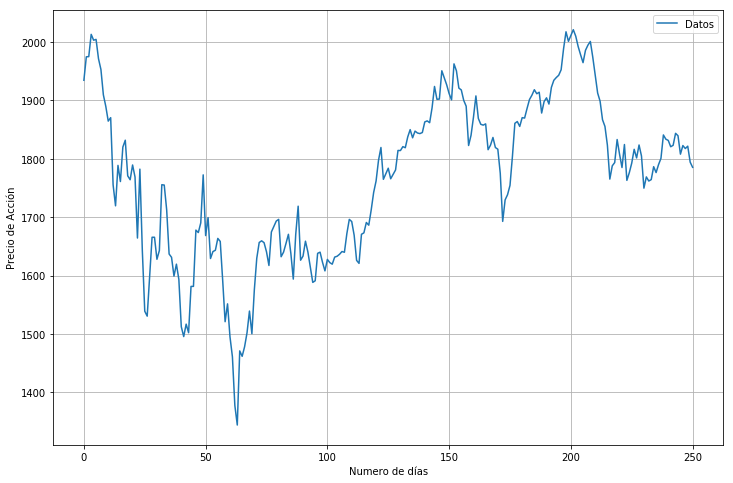

In [7]:
plt.figure(figsize=(12,8))
plt.plot(x, y, '', label = 'Datos')
plt.legend(loc = 'best')
plt.xlabel('Numero de días')
plt.ylabel('Precio de Acción')
plt.grid()

In [8]:
def obj1(beta,x,y):
    f=beta[1]*x+beta[0]
    return np.sum((y-f)**2)
beta_inicial =np.array([0,0])
resultado1=opt.minimize(obj1,beta_inicial,args=(x,y))
resultado1
beta=resultado1.x
beta

def obj2(beta,x,y):
    f=beta[2]*x**2+beta[1]*x+beta[0]
    return np.sum((y-f)**2)
beta_inicial = np.array([0,0,0])
resultado2=opt.minimize(obj2,beta_inicial,args=(x,y))
resultado2
beta_cuadratica=resultado2.x
beta_cuadratica
def obj3(beta,x,y):
    f=beta.dot([x**i for i in range(4)])
    return np.sum((y-f)**2)
beta_inicial=np.zeros(4)
resultado3=opt.minimize(obj3,beta_inicial,args=(x,y))
beta3=resultado3.x
beta3

def obj4(beta,x,y):
    f=beta.dot([x**i for i in range(5)])
    return np.sum((y-f)**2)
beta_inicial=np.zeros(5)
resultado4=opt.minimize(obj4,beta_inicial,args=(x,y))
beta4=resultado4.x
beta4
def obj5(beta,x,y):
    f=beta.dot([x**i for i in range(6)])
    return np.sum((y-f)**2)
beta_inicial=np.zeros(6)
resultado5=opt.minimize(obj5,beta_inicial,args=(x,y))
beta5=resultado5.x
beta5

ypoints= y*1e3

y1=beta[1]*x+beta[0]
y2=beta_cuadratica[2]*x**2+beta_cuadratica[1]*x+beta_cuadratica[0]
y3=beta3[3]*x**3+beta3[2]*x**2+beta3[1]*x+beta3[0]
y4=beta4[4]*x**4+beta4[3]*x**3+beta4[2]*x**2+beta4[1]*x+beta4[0]
y5=beta5[5]*x**5+beta5[4]*x**4+beta5[3]*x**3+beta5[2]*x**2+beta5[1]*x+beta5[0]
beta4

array([ 1.94379891e+03, -1.19163130e+01,  1.20069583e-01, -3.04785043e-04,
        8.82279723e-09])

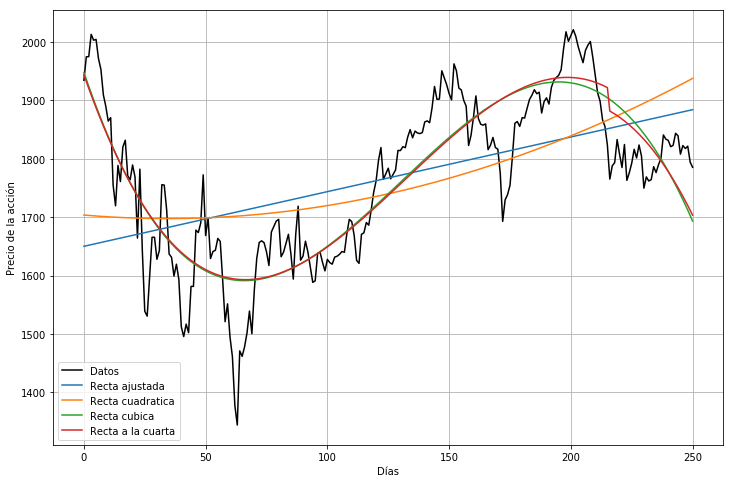

In [9]:
plt.figure(figsize=(12,8))
plt.plot(x,y,"k",label="Datos") # Graficar los puntos dados
plt.plot(x,y1,"",label="Recta ajustada") 
plt.plot(x,y2,"",label="Recta cuadratica")
plt.plot(x,y3,"",label="Recta cubica")
plt.plot(x,y4,"",label="Recta a la cuarta")
plt.xlabel("Días")
plt.ylabel("Precio de la acción")
plt.legend(loc="best")
plt.grid()
plt.show()

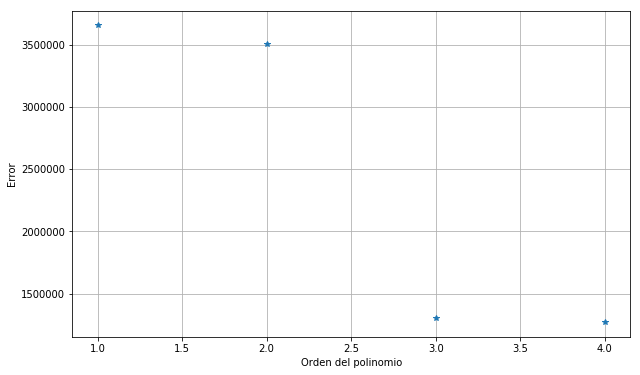

In [10]:
e_ms = []

def obj(beta,x,y,n):
    f = beta.dot([x**i for i in range(n+1)])
    return np.sum((y-f)**2)

for i in range(4):  
    beta_inicial = np.zeros(i+2)
    resultado = opt.minimize(obj, beta_inicial, args=(x,y,i+1))
    e_ms.append(resultado.fun)

plt.figure(figsize=(10,6))
plt.plot(np.arange(4)+1, e_ms, "*")
plt.xlabel("Orden del polinomio")
plt.ylabel("Error")
plt.grid()
plt.show()

In [11]:
x=53
p1=beta[1]*x+beta[0]
p2=beta_cuadratica[2]*x**2+beta_cuadratica[1]*x+beta_cuadratica[0]
p3=beta3[3]*x**3+beta3[2]*x**2+beta3[1]*x+beta3[0]
p4=beta4[4]*x**4+beta4[3]*x**3+beta4[2]*x**2+beta4[1]*x+beta4[0]
p1,p2,p3,p4,y[52]

(1699.6386519610485,
 1699.2982009326975,
 1602.0958233890074,
 1604.2039145485548,
 1629.130005)

In [12]:
co1=p1-y[52]
co2=p2-y[52]
co3=p3-y[52]
co4=p4-y[52]
co1,co2,co3,co4

(70.5086469610485, 70.16819593269747, -27.03418161099262, -24.926090451445134)

## Solución del problema: ##

. El algoritmo creado llegó a la solución en la que un polinomio de grado tres se ajusta con un menor error y sin tanta complicidad a las variaciones de la curva que muestra la acción de Amazon, con esto aplicado en el uso de análisis tecnico nos podremos dar cuenta donde son los puntos críticos (techos y soportes) de la acción para poder tomar decisiones que mejoren nuestra ganancia.

# Conclusión #

. Como podemos observar en nuestros ajustes de curvas la curva que mas se asemeja al comportamiento de la acción de Amazon es la curva del polinomio de tercer grado, con esto nos podemos guiar para asi saber donde se encuentran en un análisis técnico los soportes y los techos de la acción y con esto encontrar el momento en el que la acción se encuentra a la alza o a la baja, también en base a sus techos y resistencias saber si la acción esta estancada o si estamos cerca de un soporte y podremos comprar mas acciones o si se encuentra en un techo y venderla a su máximo precio posible

## Referencias 

IG. (2019). Análisis técnico (definición). [online] Available at: https://www.ig.com/es/glosario-trading/definicion-de-analisis-tecnico [Accessed 30 Sep. 2019].

Oliva, S. (2017). Introducción a Pandas y Jupyter Notebook de Python. [online] Available at: https://es.schoolofdata.org/2017/06/28/introduccion-a-pandas-y-jupyter-notebook-de-python/ [Accessed 30 Sep. 2019].

